<a href="https://colab.research.google.com/github/KoMurase/Learning_my_interest/blob/master/House_Prices_Advanced_Regression_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
train_data = pd.read_csv('/content/drive/My Drive/土地price/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/土地price/test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
cols=train_data.columns
for col in cols:
    if train_data[col].isnull().sum()>0:
        print(col+':{}'.format(train_data[col].isnull().sum()))
        print(col+':{}'.format(train_data[col].dtypes))
        print('---------------')

LotFrontage:259
LotFrontage:float64
---------------
Alley:1369
Alley:object
---------------
MasVnrType:8
MasVnrType:object
---------------
MasVnrArea:8
MasVnrArea:float64
---------------
BsmtQual:37
BsmtQual:object
---------------
BsmtCond:37
BsmtCond:object
---------------
BsmtExposure:38
BsmtExposure:object
---------------
BsmtFinType1:37
BsmtFinType1:object
---------------
BsmtFinType2:38
BsmtFinType2:object
---------------
Electrical:1
Electrical:object
---------------
FireplaceQu:690
FireplaceQu:object
---------------
GarageType:81
GarageType:object
---------------
GarageYrBlt:81
GarageYrBlt:float64
---------------
GarageFinish:81
GarageFinish:object
---------------
GarageQual:81
GarageQual:object
---------------
GarageCond:81
GarageCond:object
---------------
PoolQC:1453
PoolQC:object
---------------
Fence:1179
Fence:object
---------------
MiscFeature:1406
MiscFeature:object
---------------


In [6]:
isna_float_data=[]
for col in cols:
    if train_data[col].isnull().sum()>0 and train_data[col].dtypes=='float64':
        print(col+':{}'.format(train_data[col].isnull().sum()))
        print(col+':{}'.format(train_data[col].dtypes))
        isna_float_data.append(col)
isna_float_data

LotFrontage:259
LotFrontage:float64
MasVnrArea:8
MasVnrArea:float64
GarageYrBlt:81
GarageYrBlt:float64


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [0]:
import seaborn as sns 

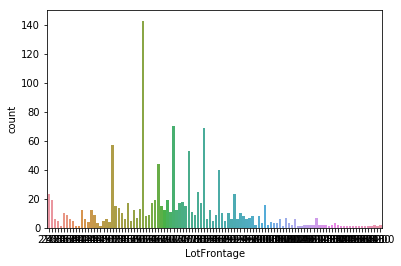

In [8]:
sns.countplot(train_data['LotFrontage'])
#Linear feet of street connected to property

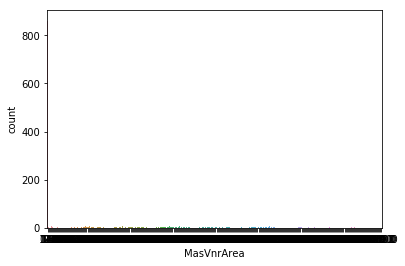

In [9]:
sns.countplot(train_data['MasVnrArea'])
#Masonry veneer area in square feet

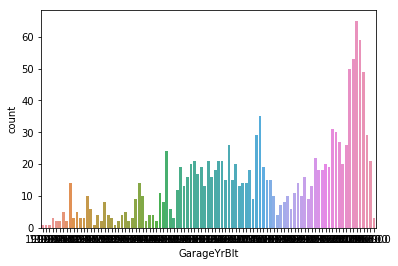

In [10]:
sns.countplot(train_data['GarageYrBlt'])
#Year garage was built

In [11]:
numeric_data=[]
for col in cols:
    if train_data[col].dtypes=='float64' or train_data[col].dtypes=='int64':
        print(col+':{}'.format(train_data[col].isnull().sum()))
        print(col+':{}'.format(train_data[col].dtypes))
        print('------------')
        numeric_data.append(col)

Id:0
Id:int64
------------
MSSubClass:0
MSSubClass:int64
------------
LotFrontage:259
LotFrontage:float64
------------
LotArea:0
LotArea:int64
------------
OverallQual:0
OverallQual:int64
------------
OverallCond:0
OverallCond:int64
------------
YearBuilt:0
YearBuilt:int64
------------
YearRemodAdd:0
YearRemodAdd:int64
------------
MasVnrArea:8
MasVnrArea:float64
------------
BsmtFinSF1:0
BsmtFinSF1:int64
------------
BsmtFinSF2:0
BsmtFinSF2:int64
------------
BsmtUnfSF:0
BsmtUnfSF:int64
------------
TotalBsmtSF:0
TotalBsmtSF:int64
------------
1stFlrSF:0
1stFlrSF:int64
------------
2ndFlrSF:0
2ndFlrSF:int64
------------
LowQualFinSF:0
LowQualFinSF:int64
------------
GrLivArea:0
GrLivArea:int64
------------
BsmtFullBath:0
BsmtFullBath:int64
------------
BsmtHalfBath:0
BsmtHalfBath:int64
------------
FullBath:0
FullBath:int64
------------
HalfBath:0
HalfBath:int64
------------
BedroomAbvGr:0
BedroomAbvGr:int64
------------
KitchenAbvGr:0
KitchenAbvGr:int64
------------
TotRmsAbvGrd:0
To

In [12]:
numeric_data

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
numeric_df = pd.DataFrame(train_data[numeric_data],columns=numeric_data)
numeric_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [15]:
#catboost 使うために必要なライブラリ
 !pip install numpy
 !pip install six
 !pip install catboost

     |████████████████████████████████| 62.5MB 35.6MB/s 


In [16]:
# オプションパッケージ
 pip install ipywidgets

In [0]:
dataset = [train_data,test_data]

In [20]:
numeric_testdata=[]
cols_test = test_data.columns
for col in cols_test:
    if test_data[col].dtypes=='float64' or test_data[col].dtypes=='int64':
        print(col+':{}'.format(test_data[col].isnull().sum()))
        print(col+':{}'.format(test_data[col].dtypes))
        print('------------')
        numeric_testdata.append(col)


Id:0
Id:int64
------------
MSSubClass:0
MSSubClass:int64
------------
LotFrontage:227
LotFrontage:float64
------------
LotArea:0
LotArea:int64
------------
OverallQual:0
OverallQual:int64
------------
OverallCond:0
OverallCond:int64
------------
YearBuilt:0
YearBuilt:int64
------------
YearRemodAdd:0
YearRemodAdd:int64
------------
MasVnrArea:15
MasVnrArea:float64
------------
BsmtFinSF1:1
BsmtFinSF1:float64
------------
BsmtFinSF2:1
BsmtFinSF2:float64
------------
BsmtUnfSF:1
BsmtUnfSF:float64
------------
TotalBsmtSF:1
TotalBsmtSF:float64
------------
1stFlrSF:0
1stFlrSF:int64
------------
2ndFlrSF:0
2ndFlrSF:int64
------------
LowQualFinSF:0
LowQualFinSF:int64
------------
GrLivArea:0
GrLivArea:int64
------------
BsmtFullBath:2
BsmtFullBath:float64
------------
BsmtHalfBath:2
BsmtHalfBath:float64
------------
FullBath:0
FullBath:int64
------------
HalfBath:0
HalfBath:int64
------------
BedroomAbvGr:0
BedroomAbvGr:int64
------------
KitchenAbvGr:0
KitchenAbvGr:int64
------------
TotR

In [19]:
numeric_data
      

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [0]:
X_train = train_data[numeric_data]
X_train = X_train.drop(['SalePrice','Id'],axis=1)
X_test = test_data[numeric_testdata]
X_test = X_test.drop('Id',axis=1)
y_train = train_data['SalePrice']
#y_test:算出したい値

In [0]:
import math

from catboost import CatBoost
from catboost import Pool

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

In [0]:
train_pool = Pool(X_train, label=y_train)
val_pool = Pool(X_val, label=y_val)
params = {
        # 損失関数に RMSE を使う
        'loss_function': 'RMSE',
        'num_boost_round': 1000,
        'early_stopping_rounds': 10,
    }

In [0]:
model = CatBoost(params)

In [70]:
model.fit(train_pool, eval_set=[val_pool])

0:	learn: 78847.8224508	test: 75197.8920061	best: 75197.8920061 (0)	total: 22.7ms	remaining: 22.7s
1:	learn: 77491.6569691	test: 73897.5045478	best: 73897.5045478 (1)	total: 40ms	remaining: 19.9s
2:	learn: 76024.0618308	test: 72556.5888410	best: 72556.5888410 (2)	total: 58.2ms	remaining: 19.4s
3:	learn: 74660.3907312	test: 71244.3845310	best: 71244.3845310 (3)	total: 76.6ms	remaining: 19.1s
4:	learn: 73337.5037740	test: 69962.3613659	best: 69962.3613659 (4)	total: 99.8ms	remaining: 19.9s
5:	learn: 72268.5149340	test: 68909.4917618	best: 68909.4917618 (5)	total: 118ms	remaining: 19.6s
6:	learn: 71076.6104434	test: 67747.3781702	best: 67747.3781702 (6)	total: 141ms	remaining: 20s
7:	learn: 69869.6888427	test: 66510.5545144	best: 66510.5545144 (7)	total: 160ms	remaining: 19.8s
8:	learn: 68668.2256423	test: 65378.3030334	best: 65378.3030334 (8)	total: 179ms	remaining: 19.7s
9:	learn: 67499.2285298	test: 64284.1105104	best: 64284.1105104 (9)	total: 198ms	remaining: 19.6s
10:	learn: 66364.51

In [0]:
y_pred = model.predict(X_test)

In [72]:
y_pred

array([125401.98975037, 162149.048292  , 185287.97349325, ...,
       184214.44866664, 120613.21579105, 244689.41109124])

In [73]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
ID = test_data['Id']

In [0]:
y_pred = pd.DataFrame(y_pred,columns=['SalePrice'])

In [0]:
submit_df = pd.concat([ID,y_pred],axis=1)
submit_df.index=submit_df.index+1

In [0]:
submit_df.to_csv('submit_file.csv',header=True,index=False)
